# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ w_{new} = w_{old} - \alpha \frac{1}{n} \sum_{j=1}^{n} \nabla{_w} L(w_{old}, a_j, y_j) = w_{old} - \alpha \left(\frac{1}{n} \sum_{i=1}^{n} 2 (y_i - a_i) (-x_i) + \frac{2}{C} w_{old}\right) = w_{old} - \alpha \left(\frac{1}{n} \sum_{i=1}^{n} 2 (a_i - y_i) (x_i) + \frac{2}{C} w_{old}\right)$$
где $a_i = x_i^T w_i$

Градиент равен среднему отклонению предсказания от целевой функции, умноженному на объект. То есть мы двигаемся в анти направлении среднего отклонения функции

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

***Ваше решение здесь***

$$ \nabla_w L(w) = - \frac{1}{n}\left[ \sum_i y_i \frac{\nabla_w a_i}{a_i} + (1 - y_i) \frac{(-1)\nabla_wa_i}{1 -a_i} \right] + \frac{2}{C} w$$

$$ \nabla_w (a_i) = x_i \sigma(\langle x_i, w \rangle) (1 - \sigma(\langle x_i, w \rangle)) = x_i a_i (1 - a_i) $$

$$ \nabla_w L(w) = - \frac{1}{n}\left[ \sum_i y_i \frac{\nabla_w a_i}{a_i} + (1 - y_i) \frac{(-1)\nabla_wa_i}{1 -a_i} \right] + \frac{2}{C} w = - \frac{1}{n}\left[ \sum_i y_i x_i (1 - a_i) - (1 - y_i) x_i a_i \right] + \frac{2}{C} w = \frac{1}{n} \left[\sum_{i=1}^n (a_i - y_i) x_i \right] + \frac{2}{C} w$$

То есть, градиенты отличаются ровно в два раза, в логистической регресси он в два раза меньше, чем в линейной.

$$ w_{new} = w_old - \alpha\left(\frac{1}{n} \left[\sum_{i=1}^n (a_i - y_i) x_i \right] + \frac{2}{C} w\right)$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

$$ G = \nabla_w ((X^T X + X^T X)w - X^T y - X^T y) = 2 X^T X $$

Выражение $(X^T X)$ называется матрицей Грама. Действительно, если мы рассмотрим каждый столбец матрицы $X$ как вектор, то в гессиане в каждой клетке будет стоять скалярное произведение пары векторов, индексы которых равны соответствующей координате клетки.

Заметим, что умножение на два не меняет тип определённости гессиана, поэтому пока я опущу его.

Поскольку матрица X имеет полный ранг и строк не меньше, чем столбцов, её столбцы линейно независимы. Соответственно, можно привести определитель $|X^TX|$ к диагональному виду путём ортогонализации системы векторов (систему, состоящую из линейно независимых векторов можно линейно преобразовать в ортогональную). Заметим, что при умножении строки или столбца на число определитель не меняется, при прибавлении одной строки к другой тоже. Таким образом, определители нашей матрицы и полученной из неё ортогонализацией будут равны.

Теперь наш определитель стал диагональным, потому что скалярное произведение двух ортогональных векторов равно нулю. На главной диагонали стоят скалярные квадраты ненулевых векторов (потому что линейно независимые), а значит матрица положительно определена и все её угловые миноры положительны.

Имеем действительно точку минимума в посчитанном на лекции месте, потому что градиент там равен нулю по построению, а гессиан положительно определён.

Для модели с регуляризацией 
$$\nabla{_w} L(w) = (X^TX+X^TX) w - X^Ty - X^Ty + \frac{2}{C} E w$$
$$ 2 (X^TX + \frac{1}{C} E)w - 2 X^Ty = 0 => w = (X^TX + \frac{1}{C}E)^{-1} X^Ty$$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Продифференцируем по $a(x_i)$ $E(L|x_i)$. Имеем 
$$ \frac{d E(L|x_i)}{d a(x_i)} = - \frac{p(y_i=1|x_i)}{a(x_i)} + \frac{p(y_i=0|x_i)}{1 - a(x_i)} $$

где $0 <= a(x_i) <= 1$, краевые случаи вызывают неопределённость: $log(0)$ неопределён.

Дальше будем рассматривать без них.

Приравняем производную к нулю. Имеем 
$$ \frac{(1 - a(x_i)) p(y_i=1|x_i) - a(x_i)(1 - p(y_i=1|x_i))}{a(x_i) (1 - a(x_i))} = 0$$

Назовём для краткости $z_i = p(y_i = 1|x_i)$

Имеем $z_i- a(x_i)z_i - a(x_i) + a(x_i)z_i = 0 <=> z_i - a(x_i) = 0 <=> z_i = a(x_i)$. Таким образом, $a(x_i) = p(y_i=1 | x_i)$ -- значение, в котором достигается экстремум матожидания.

Вторая производная равна $$\frac{p(y_i=1|x_i)}{a^2(x_i)} + \frac{p(y_i=0|x_i)}{(1 - a(x_i))^2} $$ то есть в нашей точке она равна $$\frac{1}{p(y_i=1|x_i)} + \frac{1}{p(y_i=0|x_i)} > 0$$

Значит, это минимум нашего матожидания, что и требовалось доказать.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Да, нужно. Свободный член позволяет разделяющей гиперплоскости не проходить через начало координат.
Он должен уменьшаться пропорционально весам

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    indexes = np.arange(len(X))
    
    if shuffle:
        np.random.shuffle(indexes)
    
    for i in range(0, len(indexes), batch_size):
        batch_index = indexes[i : min(i + batch_size, len(indexes))]
        yield (X[batch_index], y[batch_index])

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [3]:
# %%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        reg = 1 / self.C * np.sum(self.weights ** 2)
        loss = 0
        
        if self.model_type == 'lin_reg':
            loss += np.mean((y_batch - X_batch.dot(self.weights)) ** 2)
        
        elif self.model_type == 'log_reg':          
            one = np.ones(y_batch.shape)
            a_batch = sigmoid(X_batch.dot(self.weights))
            loss -= np.mean(y_batch * np.log(a_batch))
            loss -= np.mean(one - y_batch) * np.log(one - a_batch)
        
        loss += reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        reg_grad = 2 / self.C * self.weights
        loss_grad = np.zeros(X_batch.shape[1])
        
        if self.model_type == "lin_reg":
            a_batch = X_batch.dot(self.weights)
            loss_grad += np.mean(X_batch * (a_batch - y_batch)[:, np.newaxis], axis=0) * 2
        elif self.model_type == 'log_reg':
            a_batch = sigmoid(X_batch.dot(self.weights))
            loss_grad += np.mean(X_batch * (a_batch - y_batch)[:, np.newaxis], axis=0)
    
        loss_grad += reg_grad
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        batch_size - размер батча
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(size=X.shape[1], loc=0.0, scale=1.0)
        self.weights = np.hstack((np.zeros(1), self.weights))
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X, intercept=0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        intercept - величина порога
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        if self.model_type == "lin_reg":
            y_hat = np.sign(X.dot(self.weights) - intercept)
            y_hat[y_hat < 0] = 0
        
        elif self.model_type == 'log_reg':
            y_hat = np.sign(sigmoid(X.dot(self.weights) - intercept))
            y_hat[y_hat < 0] = 0
        
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
def plot_decision_boundary(clf, color='red'):
    ## Your code Here
    print(clf.weights)
    xy1 = (0, -clf.weights[0] / clf.weights[2])
    xy2 = (-clf.weights[0] / clf.weights[1], 0)
    if clf.model_type == 'lin_reg':
        xy1 = (0, -(clf.weights[0] - 0.5) / clf.weights[2])
        xy2 = (-(clf.weights[0] - 0.5) / clf.weights[1], 0)
    plt.axline(xy1, xy2, c=color)


[ 0.4634054   0.320553   -0.14087411]
[-0.02216223  0.80451913 -0.36735123]


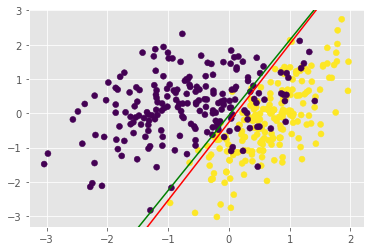

In [5]:
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = np.r_[np.ones(200), np.zeros(200)]


lin_model = MySGDClassifier(batch_generator, C=10, alpha=0.01, max_epoch=10)
lin_model.fit(X_scaled, y)
plot_decision_boundary(lin_model)

log_model = MySGDClassifier(batch_generator, C=10, alpha=0.01, max_epoch=10, model_type="log_reg")
log_model.fit(X_scaled, y)
plot_decision_boundary(log_model, color='green')

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [6]:
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

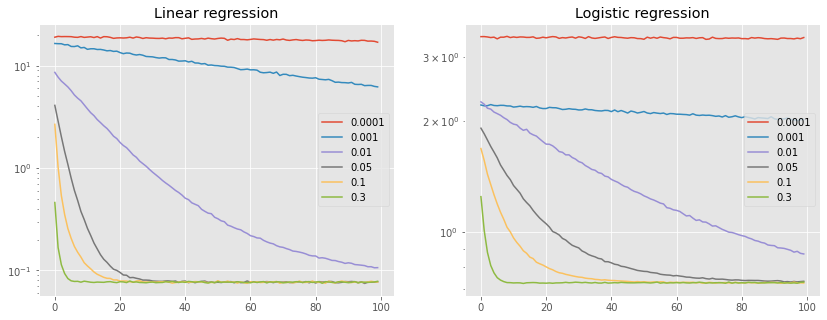

In [8]:
from sklearn.model_selection import train_test_split

plt.figure(figsize=(14,5))
fig_lin = plt.subplot(121)

plt.title('Linear regression')
plt.yscale('log')

fig_log = plt.subplot(122)
plt.title('Logistic regression')
plt.yscale('log')


alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3]
N = 100
batch_size = 5000

X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

for alpha in alphas:
    lin_model = MySGDClassifier(batch_generator, C=10, alpha=alpha, max_epoch=10)
    lin_model.fit(X_scaled, y, batch_size=batch_size)
    lin_loss = np.asarray(lin_model.errors_log['loss'])
    lin_loss_mean = [np.mean(chunk) for chunk in np.array_split(lin_loss, N)]
    fig_lin.plot(lin_loss_mean, label=str(alpha))

    log_model = MySGDClassifier(batch_generator, C=10, alpha=alpha, max_epoch=10, model_type="log_reg")
    log_model.fit(X_scaled, y, batch_size=batch_size)
    log_loss = np.asarray(log_model.errors_log['loss'])
    log_loss_mean = [np.mean(chunk) for chunk in np.array_split(log_loss, N)]
    fig_log.plot(log_loss_mean, label=str(alpha))

fig_lin.legend()
fig_log.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Чем больше альфа, тем быстрее метод вначале сходится, то есть можно обучиться за меньшее число эпох. В обеих регрессиях значения от 0.05 до 0.3 дают очень похожие результаты, но бо´льшие значения уходят на бесконечность. Для лучшей сходимости стоит выбрать 0.1, сходится уже быстро, но ещё не уходит на бесконечность.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

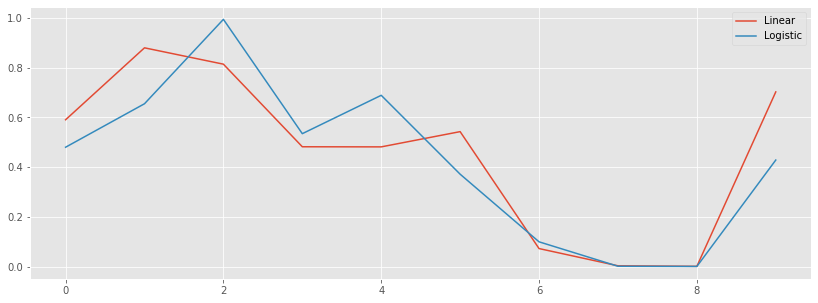

In [9]:
## Your Code Here
plt.figure(figsize=(14,5))

C_all = np.logspace(3, -3, 10)
X_scaled = scaler.fit_transform(X)
batch_size = 1000
lin_loss_mean = []
log_loss_mean = []

for C in C_all:
    lin_model = MySGDClassifier(batch_generator, C=C, alpha=0.001, max_epoch=1)
    lin_model.fit(X_scaled, y, batch_size=batch_size)
    lin_loss_mean.append(np.mean(np.abs(lin_model.weights)))

    log_model = MySGDClassifier(batch_generator, C=C, alpha=0.001, max_epoch=1, model_type="log_reg")
    log_model.fit(X_scaled, y, batch_size=batch_size)
    
    log_loss_mean.append(np.mean(np.abs(log_model.weights)))

plt.plot(lin_loss_mean, label='Linear')
plt.plot(log_loss_mean, label='Logistic')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

При оставлении альфы = 0.1 (одном из самых быстро сходящихся значений) экспонента переполнялась и происходила раскачка модели при малых С, поэтому взято значение, при котором переполнение не происходит.

Для линейной регрессии с классами (0, 1) излишнее уменьшение плохо, потому что вообще не позволит пройти порог 0.5

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [7]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
%%time

lin_model = MySGDClassifier(batch_generator, C=10, alpha=0.01, max_epoch=40, model_type='lin_reg')
lin_model.fit(X_train, y_train)

Wall time: 24.2 s


In [10]:
%%time

lin_model = MySGDClassifier(batch_generator, C=10, alpha=0.01, max_epoch=40, model_type='lin_reg')
lin_model.fit(X_train, y_train, batch_size=100)

Wall time: 417 ms


Это пример скорее для себя о том, что считать мини-батчи действительно быстрее, потому что меньше операций извлечения данных из памяти

In [11]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn import metrics

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log


Wall time: 3min 46s


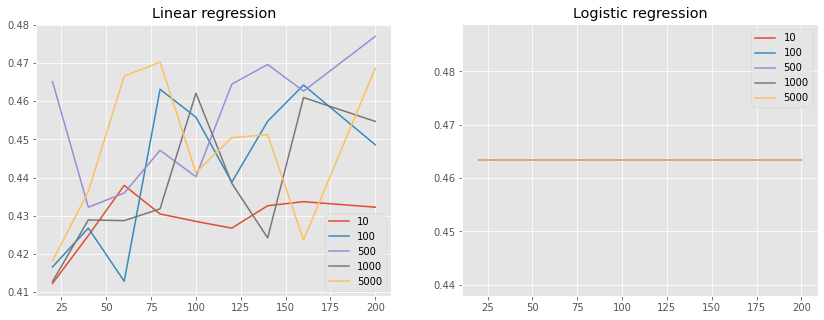

In [12]:
%%time

C_all = [10, 100, 500, 1000, 5000]
alpha = 0.001
max_epochs = [20, 40, 60, 80, 100, 120, 140, 160, 200]
batch_size = 100

plt.figure(figsize=(14,5))
fig_lin = plt.subplot(121)
plt.title('Linear regression')
# plt.yscale('log')

fig_log = plt.subplot(122)
plt.title('Logistic regression')
# plt.yscale('log')


for C in C_all:
    lin_scores = []
    log_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.2, random_state=39)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))
        
        gss = GroupShuffleSplit(n_splits=3, test_size=0.2, random_state=39)
        log_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='log_reg')
        log_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            log_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = log_model.predict(X_test)
            log_loss_curr.append(metrics.f1_score(y_test, y_pred))
        log_scores.append(np.mean(log_loss_curr))

    fig_lin.plot(max_epochs, lin_scores, label=str(C))
    fig_log.plot(max_epochs, log_scores, label=str(C))

fig_lin.legend()
fig_log.legend()

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log


Wall time: 2min 12s


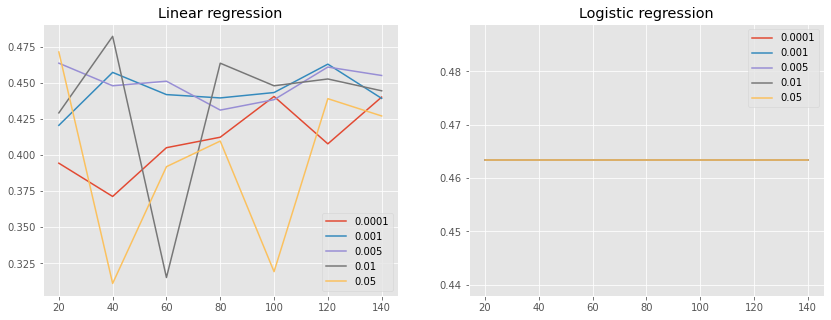

In [13]:
%%time

C = 100
alphas = [0.0001, 0.001, 0.005, 0.01, 0.05]
max_epochs = [20, 40, 60, 80, 100, 120, 140]
batch_size = 100

plt.figure(figsize=(14,5))
fig_lin = plt.subplot(121)
plt.title('Linear regression')
# plt.yscale('log')

fig_log = plt.subplot(122)
plt.title('Logistic regression')
# plt.yscale('log')


for alpha in alphas:
    lin_scores = []
    log_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.2, random_state=39)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))
        
        gss = GroupShuffleSplit(n_splits=3, test_size=0.2, random_state=39)
        log_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='log_reg')
        log_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            log_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = log_model.predict(X_test)
            # костыль, чтобы не вылетало с ошибкой -- f1 всё равно будет равно нулю, если произошло переполнение
            log_loss_curr.append(metrics.f1_score(y_test, y_pred))
        log_scores.append(np.mean(log_loss_curr))

    fig_lin.plot(max_epochs, lin_scores, label=str(alpha))
    fig_log.plot(max_epochs, log_scores, label=str(alpha))

fig_lin.legend()
fig_log.legend()

C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log


Wall time: 3min 34s


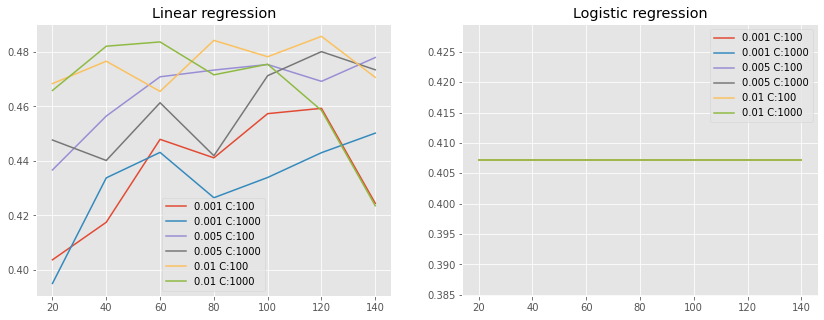

In [14]:
%%time

C_all = [100, 1000]
alphas = [0.001, 0.005, 0.01]
max_epochs = [20, 40, 60, 80, 100, 120, 140]
batch_size = 100

plt.figure(figsize=(14,5))
fig_lin = plt.subplot(121)
plt.title('Linear regression')
# plt.yscale('log')

fig_log = plt.subplot(122)
plt.title('Logistic regression')
# plt.yscale('log')

for alpha in alphas:
    for C in C_all:
        lin_scores = []
        log_scores = []
        for max_epoch in max_epochs:
            gss = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
            lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
            lin_loss_curr = []
            for train_index, test_index in gss.split(X_train, y_train, groups_train):
                X_train_curr, X_test = X_train[train_index], X_train[test_index]
                y_train_curr, y_test = y_train[train_index], y_train[test_index]
                lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
                y_pred = lin_model.predict(X_test)
                lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
            lin_scores.append(np.mean(lin_loss_curr))

            gss = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
            log_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='log_reg')
            log_loss_curr = []
            for train_index, test_index in gss.split(X_train, y_train, groups_train):
                X_train_curr, X_test = X_train[train_index], X_train[test_index]
                y_train_curr, y_test = y_train[train_index], y_train[test_index]
                log_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
                y_pred = log_model.predict(X_test)
                log_loss_curr.append(metrics.f1_score(y_test, y_pred))
            log_scores.append(np.mean(log_loss_curr))

        fig_lin.plot(max_epochs, lin_scores, label=str(alpha) + ' C:' +str(C))
        fig_log.plot(max_epochs, log_scores, label=str(alpha) + ' C:' +str(C))

fig_lin.legend()
fig_log.legend()

Wall time: 2min 17s


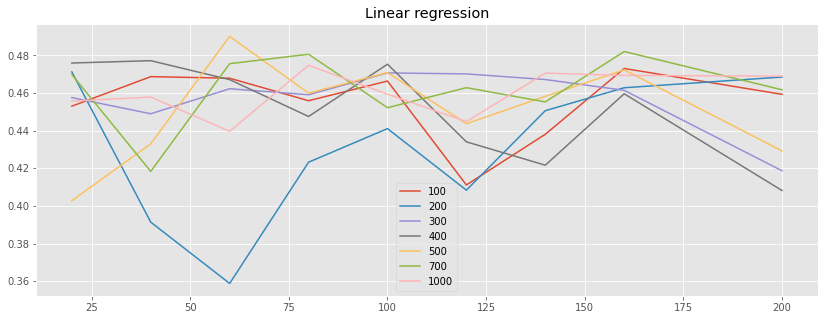

In [15]:
%%time

C_all = [100, 200, 300, 400, 500, 700, 1000]
alpha = 0.01
max_epochs = [20, 40, 60, 80, 100, 120, 140, 160, 200]
batch_size = 100

plt.figure(figsize=(14,5))
fig_lin = plt.subplot(111)
plt.title('Linear regression')


for C in C_all:
    lin_scores = []
    log_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.2, random_state=39)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))

    fig_lin.plot(max_epochs, lin_scores, label=str(C))

fig_lin.legend()

Wall time: 1min 57s


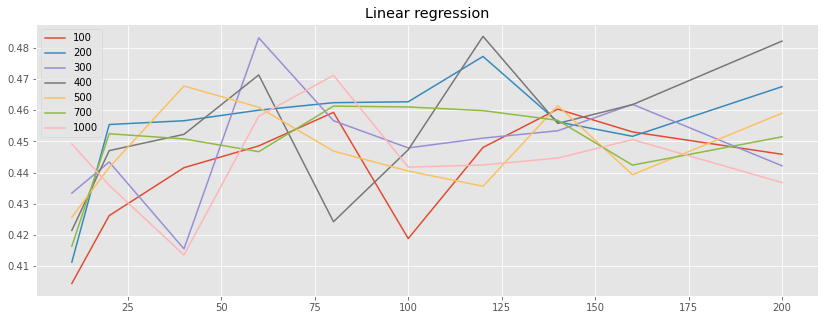

In [16]:
%%time

C_all = [100, 200, 300, 400, 500, 700, 1000]
alpha = 0.001
max_epochs = [10, 20, 40, 60, 80, 100, 120, 140, 160, 200]
batch_size = 100

plt.figure(figsize=(14,5))
fig_lin = plt.subplot(111)
plt.title('Linear regression')
# plt.yscale('log')


for C in C_all:
    lin_scores = []
    log_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.2, random_state=39)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
#         lin_model.fit(X_train, y_train, batch_size=batch_size)
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))

    fig_lin.plot(max_epochs, lin_scores, label=str(C))

fig_lin.legend()

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Wall time: 1min 15s


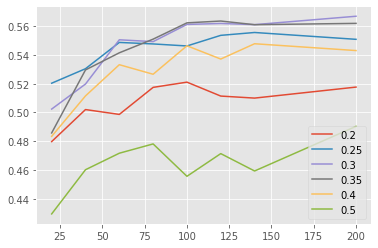

In [17]:
%%time

lines = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
max_epochs = [20, 40, 60, 80, 100, 120, 140, 200]
C = 1000
alpha = 0.01
batch_size = 100

for line in lines:
    lin_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test, intercept=line)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))
    plt.plot(max_epochs, lin_scores, label=str(line))
plt.legend()

Wall time: 1min 39s


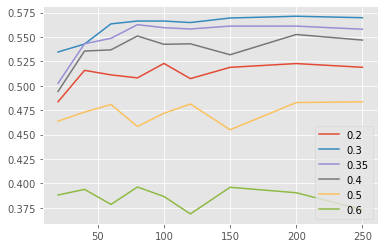

In [18]:
%%time

lines = [0.2, 0.3, 0.35, 0.4, 0.5, 0.6]
max_epochs = [20, 40, 60, 80, 100, 120, 150, 200, 250]
C = 100
alpha = 0.01
batch_size = 100

for line in lines:
    lin_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test, intercept=line)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))
    plt.plot(max_epochs, lin_scores, label=str(line))
plt.legend()

Wall time: 38.8 s


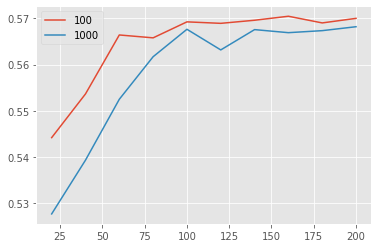

In [19]:
%%time

line = 0.3
max_epochs = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
C_all = [100, 1000]
alpha = 0.01
batch_size = 100

for C in C_all:
    lin_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test, intercept=line)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))
    plt.plot(max_epochs, lin_scores, label=str(C))
plt.legend()

Wall time: 35.1 s


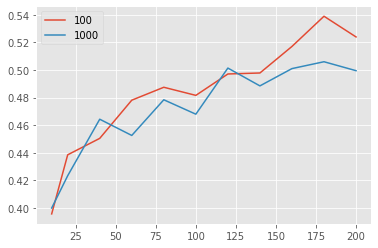

In [21]:
%%time

line = 0.3
max_epochs = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
C_all = [100, 1000]
alpha = 0.001
batch_size = 100

for C in C_all:
    lin_scores = []
    for max_epoch in max_epochs:
        gss = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
        lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
        lin_loss_curr = []
        for train_index, test_index in gss.split(X_train, y_train, groups_train):
            X_train_curr, X_test = X_train[train_index], X_train[test_index]
            y_train_curr, y_test = y_train[train_index], y_train[test_index]
            lin_model.fit(X_train_curr, y_train_curr, batch_size=batch_size)
            y_pred = lin_model.predict(X_test, intercept=line)
            lin_loss_curr.append(metrics.f1_score(y_test, y_pred))
        lin_scores.append(np.mean(lin_loss_curr))
    plt.plot(max_epochs, lin_scores, label=str(C))
plt.legend()

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [46]:
%%time
max_epochs = 140
C = 100
alpha = 0.01
batch_size = 100
line = 0.3
lin_model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
lin_model.fit(X_train, y_train, batch_size)

Wall time: 1.51 s


In [47]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, target))

In [48]:
import numpy as np
y_test = []
X_test = []
docs_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        docs_test.append(doc_id)
        y_test.append(target_id)
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
y_test = np.array(y_test)
docs_test = np.array(docs_test)
groups_test = np.array(groups_test)
print(X_test.shape, y_test.shape, groups_test.shape)

(16627, 15) (16627,) (16627,)


** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [50]:
X_test_scaled = scaler.transform(X_test)
y_pred = lin_model.predict(X_test_scaled, intercept=line).astype(int)

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
doc_id = np.arange(11691, 28318)
submission_dict = {'pair_id' : doc_id, 'target' : y_pred}

df = pd.DataFrame(submission_dict)
df.to_csv('predict.csv', index=False)

In [52]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([10958,  5669], dtype=int64))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Лично я успела допустить ошибки в базовых деталях обучения моделей -- шаффлила только $X$, забывая про $y$, например. Возможно, можно это проговаривать, потому что в первой домашней работе использовались библиотечные шаффлы, которые сами синхронно всё шаффлили, а вот руками нужно было делать преобразования (стандартизация / нормализация данных) только над $X$. В голову просто сразу не приходит мысль, что $y$ нужно тоже преобразовывать (шаффлить) синхронно.